In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
upload=files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:
data=pd.read_csv('IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**There is no null values in the given dataa**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe().style.background_gradient('Accent_r')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


**-->Sepal Length is moderately correlated with petal_length,petal_width and species.**

**-->sepal_width is less correlated with all the attributes.So that we can say that sepal width values are not much affect the species**

**-->petal length is highly correalted with all the attributes except sepal_width**

**-->petal_width is higly correlated with all the attributes except sepal_width**

**-->species are highly correlated with the petal_length,petal_width,species and moderately correlated with the sepal_length and less corelated with the sepal_width.**

<Axes: >

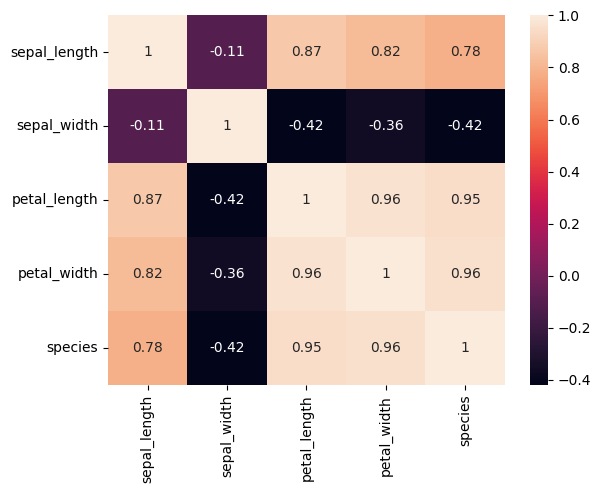

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='species', ylabel='count'>

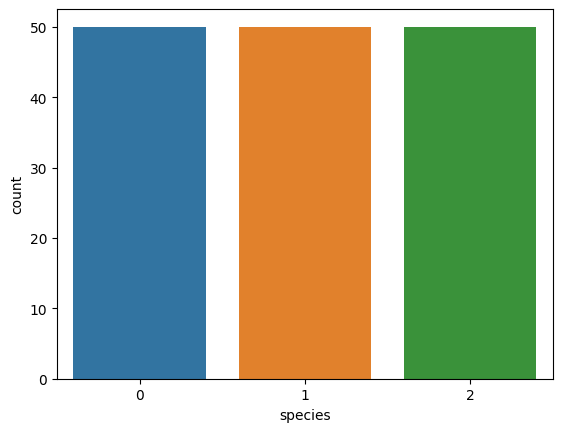

In [ ]:
sns.countplot(x=data['species'])

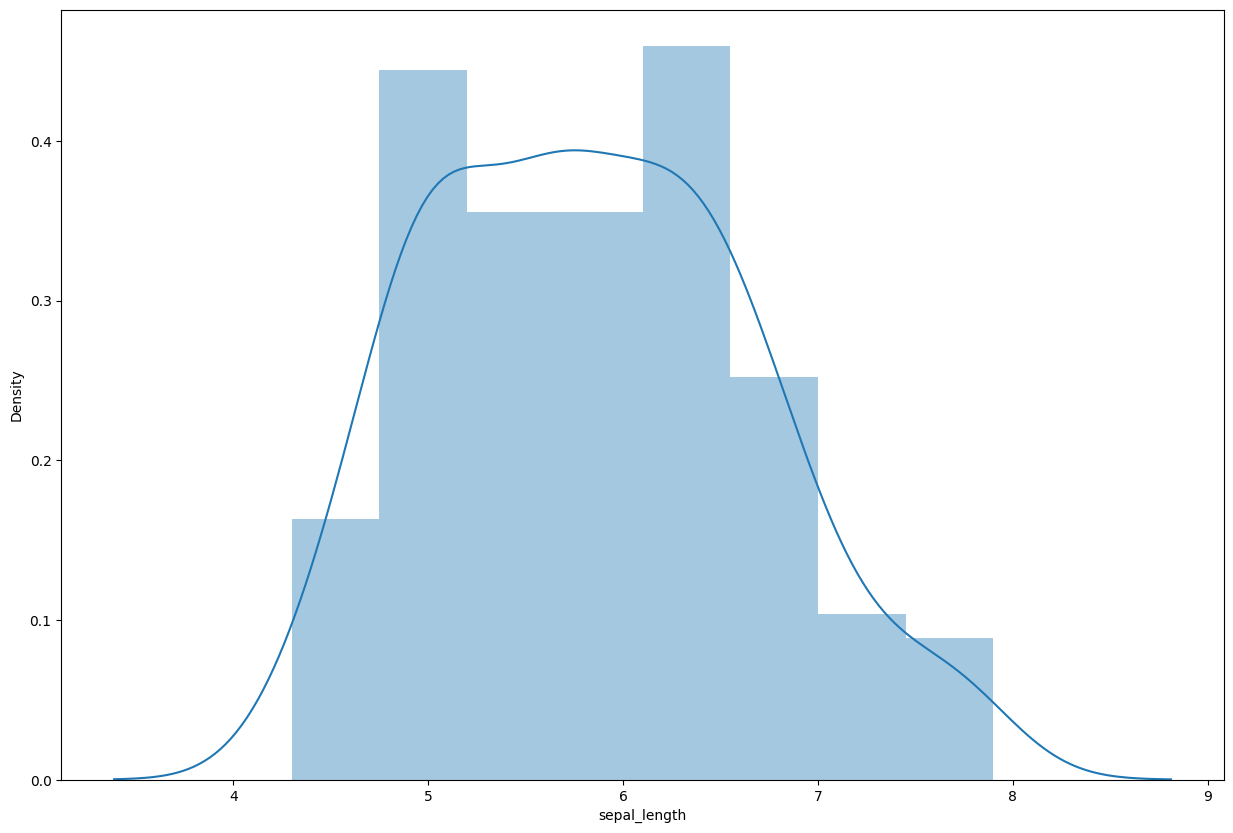

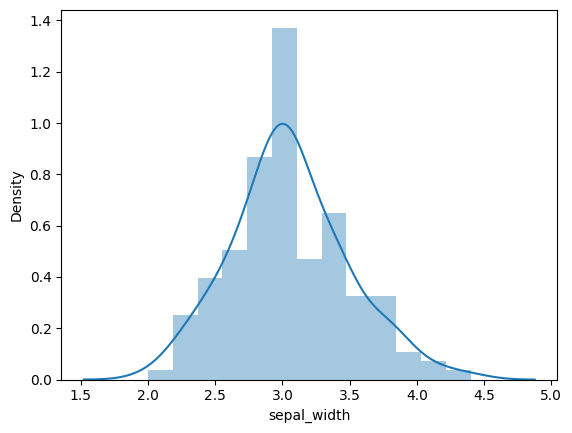

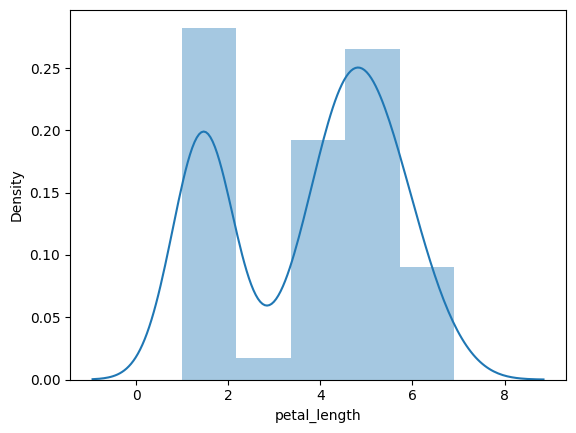

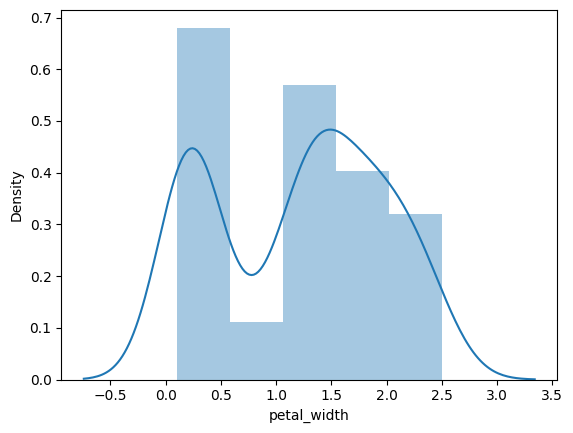

In [ ]:
columns=['sepal_length','sepal_width','petal_length','petal_width']
plt.subplots(figsize=(15,10))
for i in columns:
  sns.distplot(data[i],label=True)
  plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
plt.figure(figsize=(15,5))
px.pie(data,values='sepal_length',names='species')

<Figure size 1500x500 with 0 Axes>

In [ ]:
columns=['sepal_length','sepal_width','petal_length','petal_width']
for i in columns:
  fig=px.strip(data,x='species',y=data[i],color='species')
  fig.show()

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=200)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**model training**

In [ ]:
y_pred_train=model.predict(x_train )
y_pred=model.predict(x_test)

**Validating the model **

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test,y_pred)
accuracy_train=accuracy_score(y_train,y_pred_train)

In [ ]:
print('Accuracy of the train model :',accuracy_test)
print('Accuracy of the test model :',accuracy_test )

Accuracy of the train model : 1.0
Accuracy of the test model : 1.0


** Checking the Model **

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
84,1,1
122,2,2
28,0,0
24,0,0
75,1,1
109,2,2
81,1,1
98,1,1
80,1,1
100,2,2
